06/22/2021 6장 확률론부터 복습 시작

# 확률변수  
## 표본을 실수 데이터로 바꿔서 현실에 보내주는 것 

- 1 동전 앞 뒤 중 하나 뽑기 : 베르누이 확률변수
- 2 트펌프 카드 뭉치에서 한 장 뽑기 : 카테고리 확률변수
- 3 동전 두변 던진 결과 : 다변수 확률변수
- 4 약속날짜가 31일인가 아닌가 : 베르누이 확률변수
- 5 손님이 과일가게에서 산 과일은? : 카테고리 확률변수
- 6 삼성전자 주식은 몇 %나 내일 오를까? : 연속확률변수
- 7 회전하는 원판에 화살 박힌 각도는 ? : 연속확률변수
- 8 체온 측정 결과는? : 연속확률변수

# 확률문제 : 확률적 데이터 생성하는 문제 

# 확률의 수학적 정의 : '확률은 함수다'

# 확률론 용어 정리 
- 표본 : 1회 시행 결과
- 표본공간 : '가능한' 모든 표본의 집합
- 사건 : 표본공간의 부분집합 & 표본들의 집합
- 이산확률변수 : 표본과 표본 사이에 다른 실수가 들어갈 수 있으면 이산확률변수 (불연속)
- 연속확률변수 : 표본과 표본 사이 다른 실수 못 들어가면 연속확률변수 (연속적, 개수 : 무한대)
- 확률 : 함수다. {입력 : 사건, 출력 : 실숫값(확률값)}


In [16]:
# 연습문제 6.2.4 
omega = {1,2,3,4}

# 집합의 부분집합 구하는 패키지 
from itertools import chain, combinations

def get_set_of_subsets(omega) : 
    return set([frozenset(s) for s in chain.from_iterable(combinations(omega, r) for r in range(len(omega)+1))])

# itertools : 새로운 반복자를 만들어주는 모듈
- chain() : iterable 객체 여러개를 연결시켜서 하나의 반복자로 만들어준다. 

In [24]:
list(chain('ABC',[1,2,3]))

['A', 'B', 'C', 1, 2, 3]

In [14]:
from itertools import chain, combinations
list(chain.from_iterable(combinations(omega,r) for r in range(len(omega)+1)))

[(),
 (1,),
 (2,),
 (3,),
 (4,),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 4),
 (2, 3, 4),
 (1, 2, 3, 4)]

# combinations(iterator, 조합 크기)
combinations(iterator, 조합 크기)
- 입력받은 크기의 조합 예시를 만들어준다

In [32]:
list(combinations(omega,3))

[(1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4)]

In [36]:
# 다시해보자. 
omega = {1,2,3,4}
from itertools import chain, combinations
def get_set_of_subsets(omega) : 
    return set([frozenset(s) for s in chain.from_iterable(combinations(omega, r) for r in range(len(omega)+1))])
get_set_of_subsets(omega)


{frozenset(),
 frozenset({3, 4}),
 frozenset({2}),
 frozenset({1, 4}),
 frozenset({3}),
 frozenset({2, 3}),
 frozenset({2, 3, 4}),
 frozenset({1, 2}),
 frozenset({2, 4}),
 frozenset({1}),
 frozenset({1, 2, 4}),
 frozenset({1, 3}),
 frozenset({1, 2, 3}),
 frozenset({4}),
 frozenset({1, 3, 4}),
 frozenset({1, 2, 3, 4})}

In [37]:
#2. 
omega3 = {'11','00','01','10'} # 동전 두번던지는 문제 표본공간
from itertools import chain, combinations

get_set_of_subsets(omega3)

{frozenset(),
 frozenset({'00'}),
 frozenset({'01'}),
 frozenset({'00', '11'}),
 frozenset({'00', '01'}),
 frozenset({'00', '01', '10'}),
 frozenset({'00', '01', '11'}),
 frozenset({'00', '10'}),
 frozenset({'11'}),
 frozenset({'01', '11'}),
 frozenset({'10'}),
 frozenset({'01', '10'}),
 frozenset({'10', '11'}),
 frozenset({'01', '10', '11'}),
 frozenset({'00', '10', '11'}),
 frozenset({'00', '01', '10', '11'})}

# 확률은 함수[입력-출력 사이 대응관계]다. 
- 입력 : 사건(확률변숫값)
- 출력 : 실숫값(확률값)

# 확률의 기본공리 [콜모고로프 공리]
1. 모든 확률값은 0이상이다.
2. 표본공간 (전체)의 확률값은 1이다. 
3. 두 사건 교집합이 공집합 일 때, 두 사건 합집합 확률은 개별사건 확률합과 같다. 

# 확률변숫값은 1개 표본(표본, 사건) 이고 확률밀도함수 이용해서 확률 정의할 수 있다. 

In [46]:
# 6.2.5 연습문제 
#1. 
omega1 = {'1':0,'2':0.1,'3':0.2,'4':0.7}
omega2 = {'11':0.1,'00':0.1,'10':0.5,'01':0.3}

froz = {frozenset():0,
 frozenset({'00'}):0.1,
 frozenset({'01'}):0.3,
 frozenset({'00', '11'}):0.2,
 frozenset({'00', '01'}):0.4,
 frozenset({'00', '01', '10'}):0.9,
 frozenset({'00', '01', '11'}):0.5,
 frozenset({'00', '10'}):0.6,
 frozenset({'11'}):0.1,
 frozenset({'01', '11'}):0.4,
 frozenset({'10'}):0.5,
 frozenset({'01', '10'}):0.8,
 frozenset({'10', '11'}):0.6,
 frozenset({'01', '10', '11'}):0.9,
 frozenset({'00', '10', '11'}):0.7,
 frozenset({'00', '01', '10', '11'}):1}
print(froz.values())


dict_values([0, 0.1, 0.3, 0.2, 0.4, 0.9, 0.5, 0.6, 0.1, 0.4, 0.5, 0.8, 0.6, 0.9, 0.7, 1])


In [76]:
# 6.2.6 연습문제 
dice = {1,2,3,4,5,6} 
result = get_set_of_subsets(dice)

prob = {}
for i in result : 
    probability = 0.0
    if 1 in i : 
        probability += 0.5
    if 2 in i : 
        probability += 0.1
    if 3 in i : 
        probability += 0.1
    if 4 in i : 
        probability += 0.1
    if 5 in i : 
        probability += 0.2
    if 6 in i : 
        probability += 0 
    prob[i] = probability
prob


{frozenset({1, 3, 5}): 0.8,
 frozenset({1, 4}): 0.6,
 frozenset({4, 6}): 0.1,
 frozenset({2, 3}): 0.2,
 frozenset({2, 3, 4}): 0.30000000000000004,
 frozenset({1, 4, 5, 6}): 0.8,
 frozenset({2, 6}): 0.1,
 frozenset({4, 5}): 0.30000000000000004,
 frozenset({2, 3, 5, 6}): 0.4,
 frozenset({1, 2, 3, 6}): 0.7,
 frozenset({1}): 0.5,
 frozenset({1, 2, 3, 4, 5, 6}): 1.0,
 frozenset({2, 4, 5, 6}): 0.4,
 frozenset({4, 5, 6}): 0.30000000000000004,
 frozenset({1, 3, 4, 6}): 0.7,
 frozenset({2, 3, 4, 6}): 0.30000000000000004,
 frozenset({1, 2, 3, 4, 6}): 0.7999999999999999,
 frozenset({1, 3, 4, 5, 6}): 0.8999999999999999,
 frozenset({1, 4, 6}): 0.6,
 frozenset({3, 4}): 0.2,
 frozenset({2, 4, 6}): 0.2,
 frozenset({3, 4, 5, 6}): 0.4,
 frozenset({1, 2, 3, 4, 5}): 1.0,
 frozenset({2, 4}): 0.2,
 frozenset({5, 6}): 0.2,
 frozenset({2, 3, 5}): 0.4,
 frozenset({3, 4, 6}): 0.2,
 frozenset({3, 5}): 0.30000000000000004,
 frozenset({2, 5, 6}): 0.30000000000000004,
 frozenset({3, 4, 5}): 0.4,
 frozenset({1, 6}):

# 핵심 : 확률값은 콜모고로프 3 공리만 만족하면 뭐든 할당해도 된다. 

### 확률값이 불공정하게 배당된다는 증거가 없으면 공정하다고 보고, 다음 식을 확률함수 식으로 사용한다. 
### $|A|$/$|\Omega|$
- 표본공간 크기에 대한 특정 사건 크기 

# 아무 의미없는 확률값에 의미부여 : 빈도주의 관점, 베이지안 관점
- 빈도주의 관점에서는 [반복에 대한 비율] 을 확률값으로 삼는다. 
- 베이지안 관점에서는 [주장에 대한 신뢰도] 를 확률값으로 삼는다. 

# 베이지안 관점에서 
### 특정 사건이 발생했다 = 선택된 표본이 그 사건 원소중 하나였다 = 그 사건이 말하는 주장이 진실임을 알게 되었다. 

# 1개 사건 & 확률값에 대해 빈도주의관점과 베이지안 관점 모두 설명 가능하다. 
- 빈도주의 관점 & 베이지안 관점은 양립가능하다. 

# 확률의 3가지 주요 성질 
- 여집합 확률 : P($A^{C}$) = 1 - P(A)
- 포함-배제 원리 : P(AUB) = P(A)+P(B)-P(AnB)
- 전체확률의 법칙 : P(A) = $\sum^{N}_{i=`}$$P(AnC_{i})$

# 확률분포함수 
### - 확률분포 : 확률값 [분포위치],[분포정도] 나타낸다. 
### - 확률분포함수 : 바로 이 확률분포를 묘사해주는 함수가 확률분포함수다. 

# 세 가지 확률분포함수 
### - 확률질량함수 : 단순사건 확률값 정의하는 함수 <확률변숫 값이 이산적. 불연속적 일 때 사용>  [실질적으로 표본 하나에 대한 확률 정의하는 함수다]
### - 확률밀도함수 : 특정 표본값 근처 미세 구간 dx 길이에 대한 확률값 정의하는 함수 <확률변숫 값이 연속적. 갯수가 무한할 때 사용>
### - 누적분포함수 : $F_{X}(x)$=$P({-\infty<X<=x})$ 왼쪽 특수한 구간 확률 정의하는 함수

# 다시 정리 : 확률변수 개념을 이용할 때 
### - 확률질량함수는 이산확률변수일 때 사용한다. 
- 각 이산확률변숫값 하나하나에 대한 확률 정의한다. 

### - 확률밀도함수는 연속확률변수일 때 사용한다. 
- 각 연속확률변숫값 하나하나에 대한 확률 정의한다. 


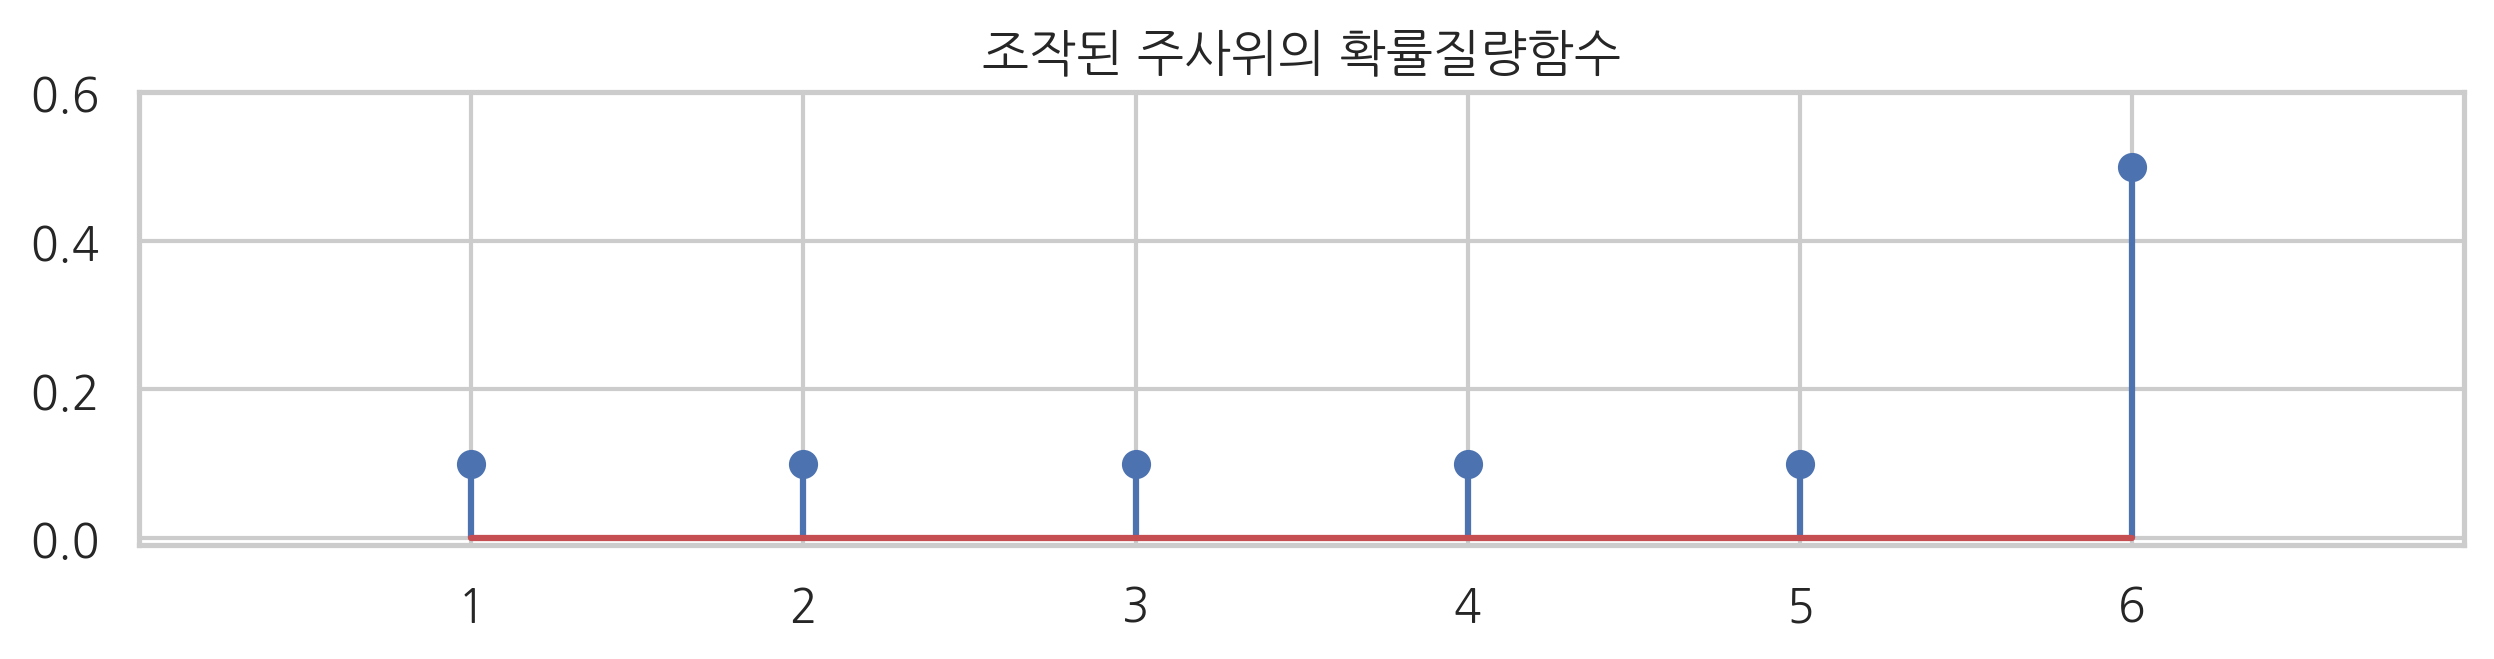

In [94]:
# 확률질량함수 # 카테고리 확률변수 : 주사위 던지는 예 
x = np.arange(1,7)
y = np.array([0.1,0.1,0.1,0.1,0.1,0.5])
plt.figure(figsize=(10,2))
plt.stem(x,y)
plt.title('조작된 주사위의 확률질량함수')
plt.xlim(0,7)
plt.ylim(-0.01,0.6)
plt.xticks(np.arange(1,7))
plt.show()


In [50]:
# 6.4.3 연습문제 
def P(a,b) : 
    if b <= a :
        raise ValueError('b는 a보다 커야합니다') 
    else : 
        if b <= 180 : 
            return (2/3)*((b-a)/180)
        else : 
            if a < 180 and 180 < b : 
                return (2/3)*((180-a)/180)+(1/3)*((b-180)/180)
            return (1/3)*((b-a)/180)
P(0,270)

0.8333333333333333

# lambda 함수 안에 조건 걸 때 : 
### - [1번째 return문] if 조건 else [2번째 return문] if 조건 else ....
### - 가장 마지막 조건문은 뒤에 if로 못 끝난다. else [return문] 에서 끝나야 된다. 

In [55]:
P = lambda a,b : (2/3)*((b-a)/180) if b <= 180 else (2/3)*((180-a)/180)+(1/3)*((b-180)/180) if a < 180 and 180 < b else (1/3)*((b-a)/180)
P(0,270)

0.8333333333333333

# 누적분포함수 cdf()
### 구간 끝값 x가 작아지면 확률값 0으로 한없이 작아지고, x가 $+\infty$ 쪽으로 커지면 1로 한없이 다가간다. 

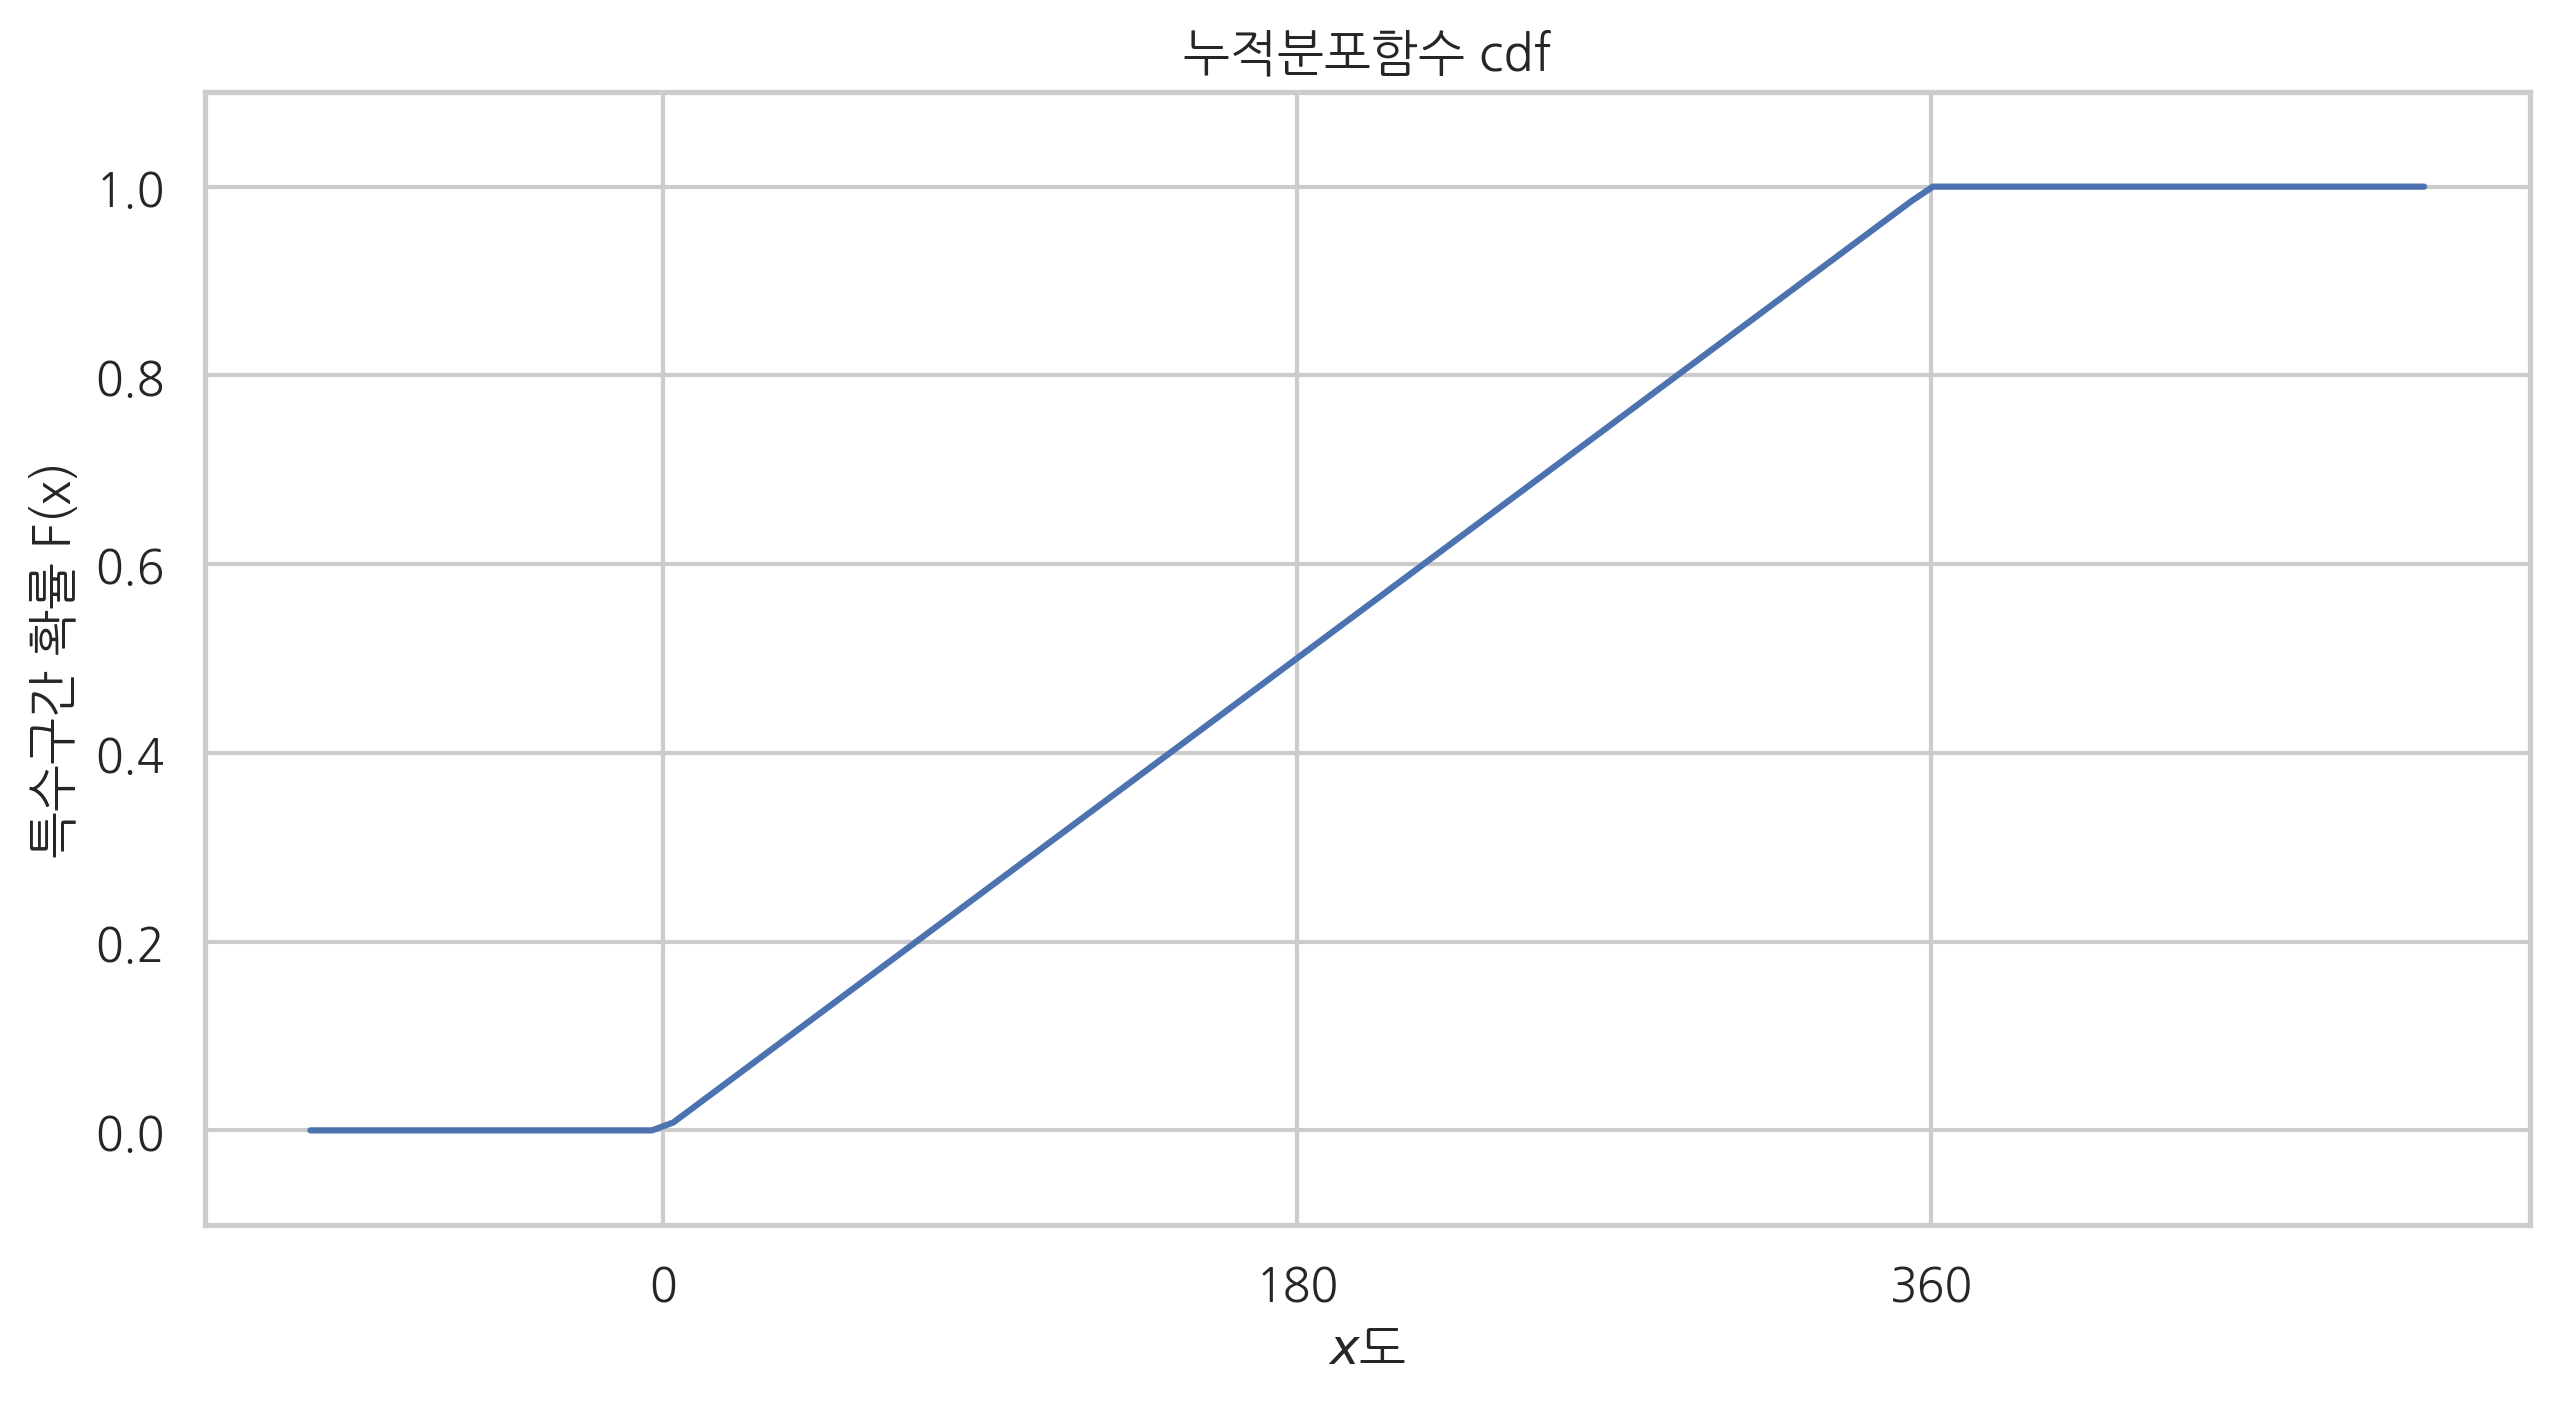

In [66]:
# 누적분포함수 그려보자. 
xx = np.linspace(-100,500,100)
F = xx/360 # 누적분포함수 값들
F[xx<0] = 0
F[1<F] = 1
plt.figure(figsize=(10,5))
plt.plot(xx, F)
plt.ylim(-0.1,1.1)
plt.xticks([0,180,360])
plt.title('누적분포함수 cdf')
plt.xlabel('$x$도')
plt.ylabel('특수구간 확률 F(x)')
plt.show()

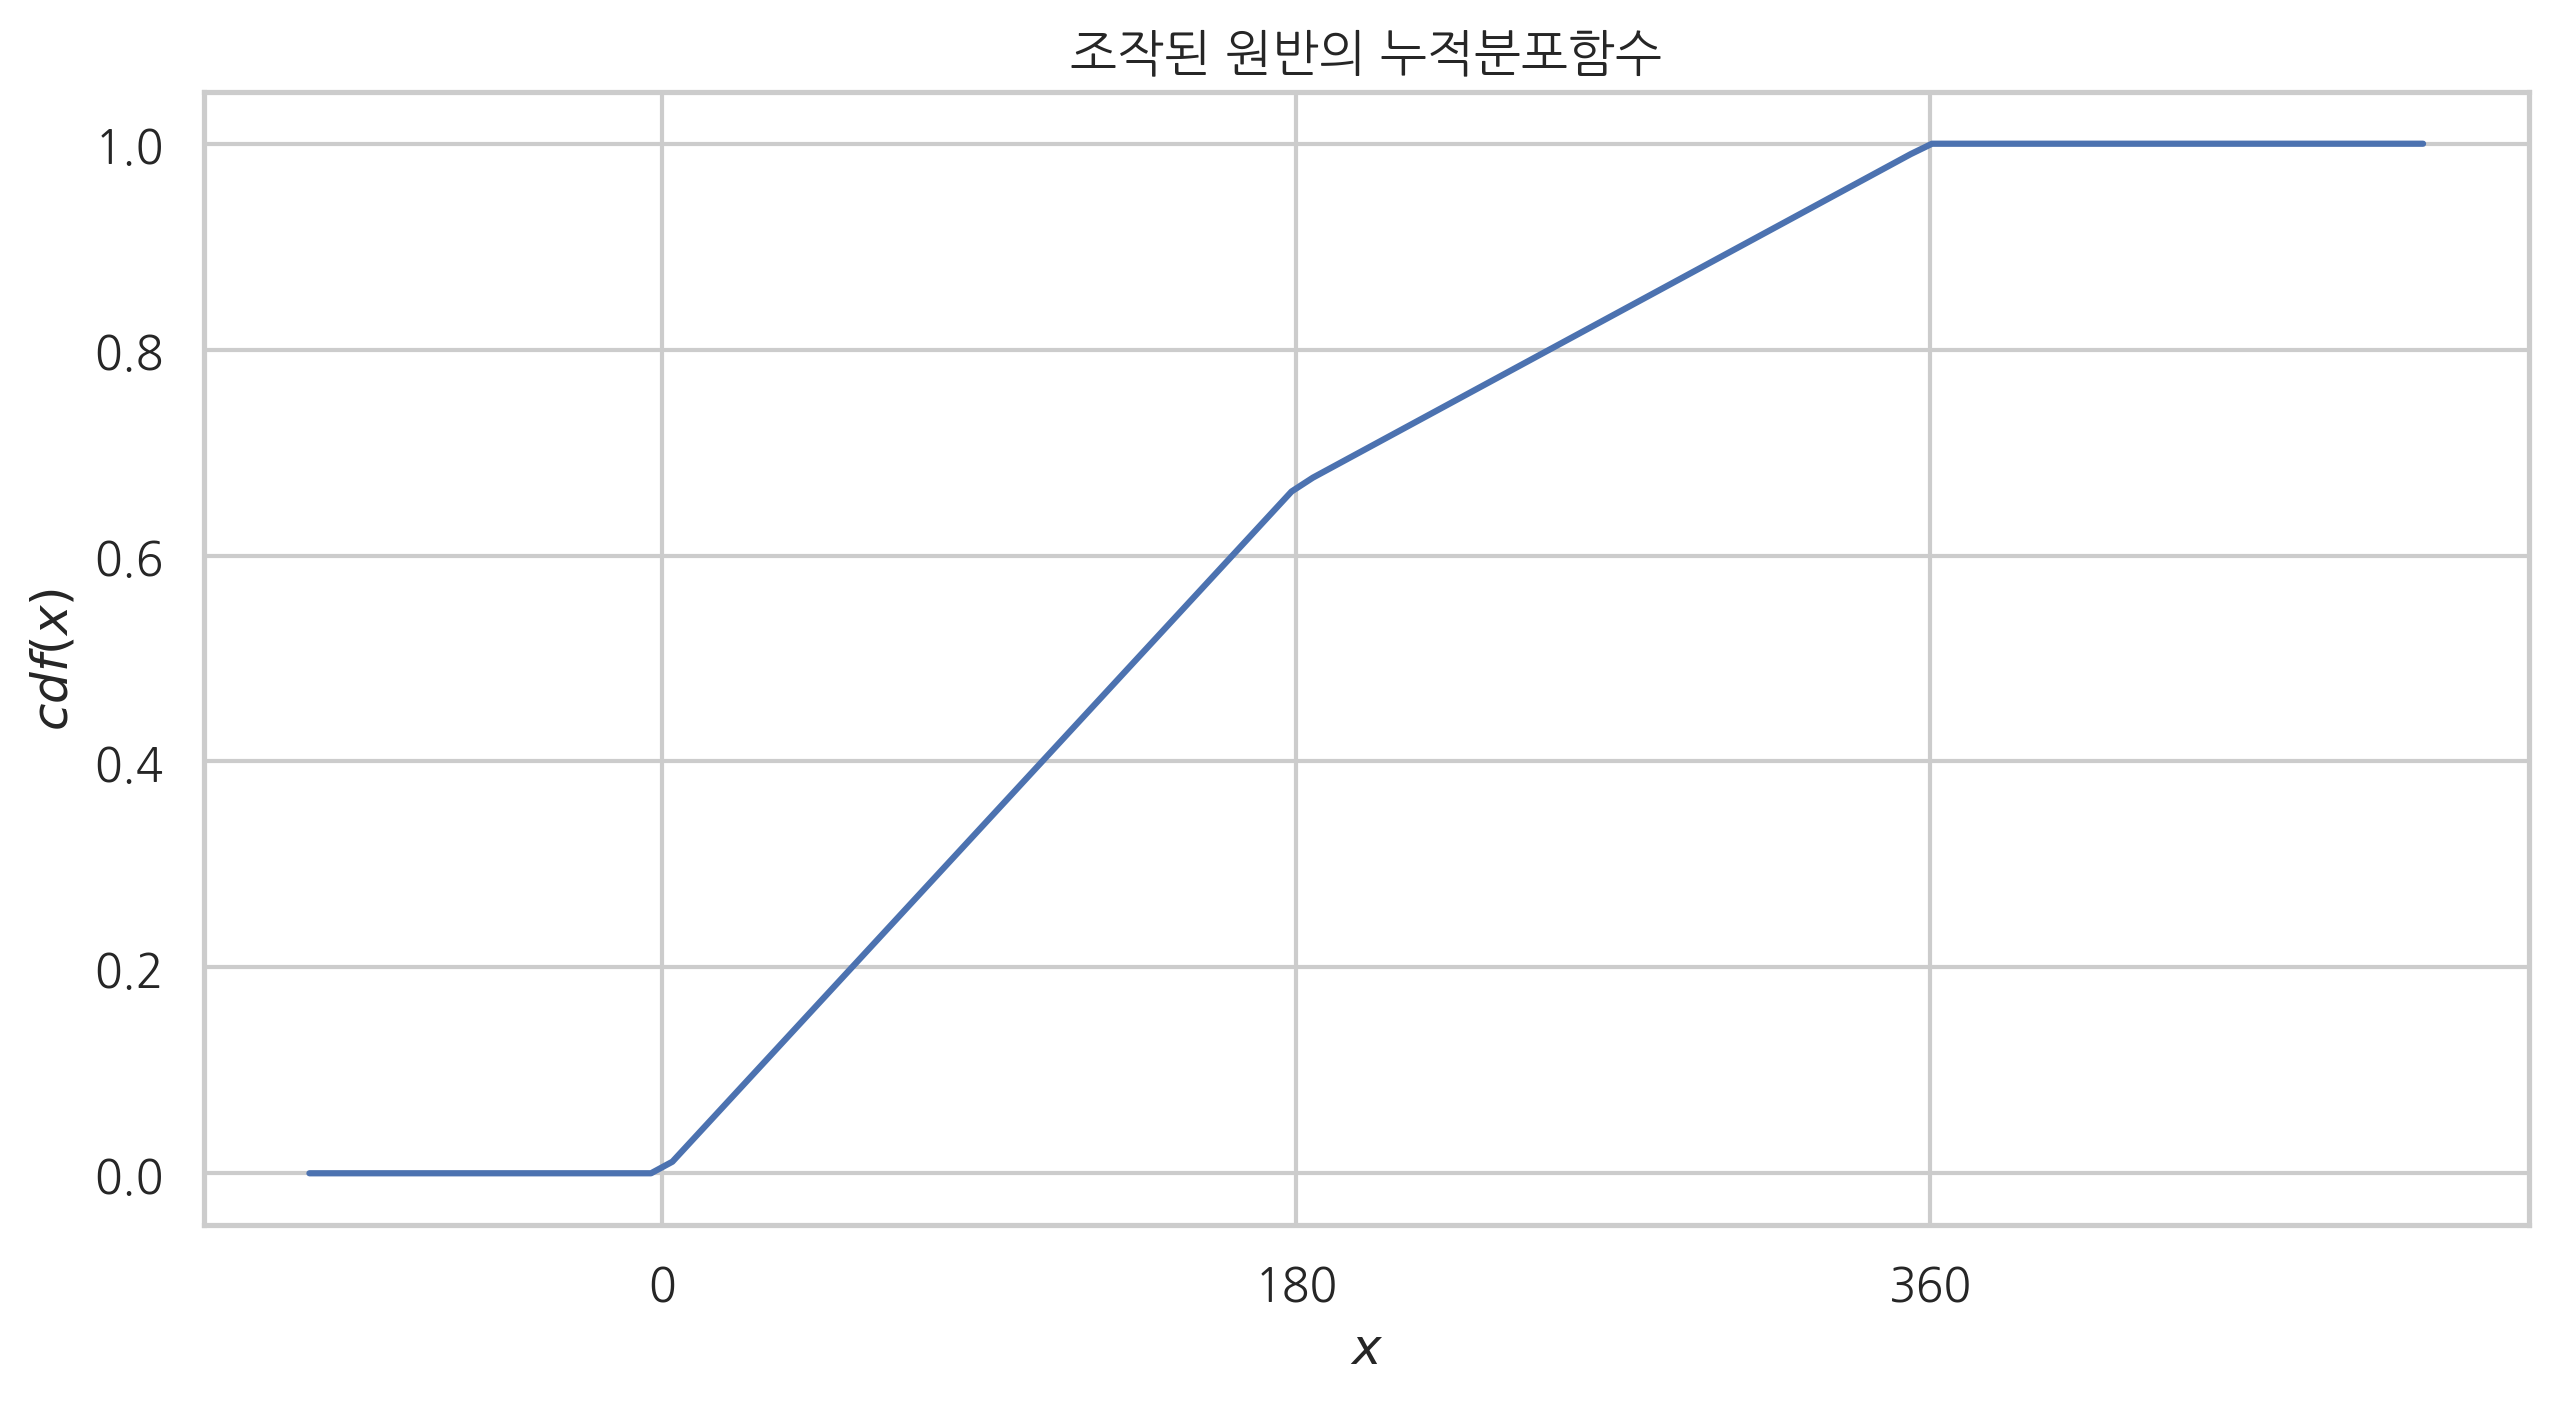

In [82]:
# 6.4.4 연습문제 
def cdf(x) : 
    if 0<= x <= 180 : 
        return (2/3)*(x/180)
    elif 180 < x <= 360 : 
        return (2/3)+(1/3)*((x-180)/180)
    else : 
        if x < 0 : 
            return 0
        else : 
            return 1

xx = np.linspace(-100,500,100)
result = [cdf(i) for i in xx ]

plt.figure(figsize=(10,5))
plt.plot(xx, result)
plt.title('조작된 원반의 누적분포함수')
plt.xlabel('$x$')
plt.ylabel('$cdf(x)$')
plt.xticks([0,180,360])
plt.show()

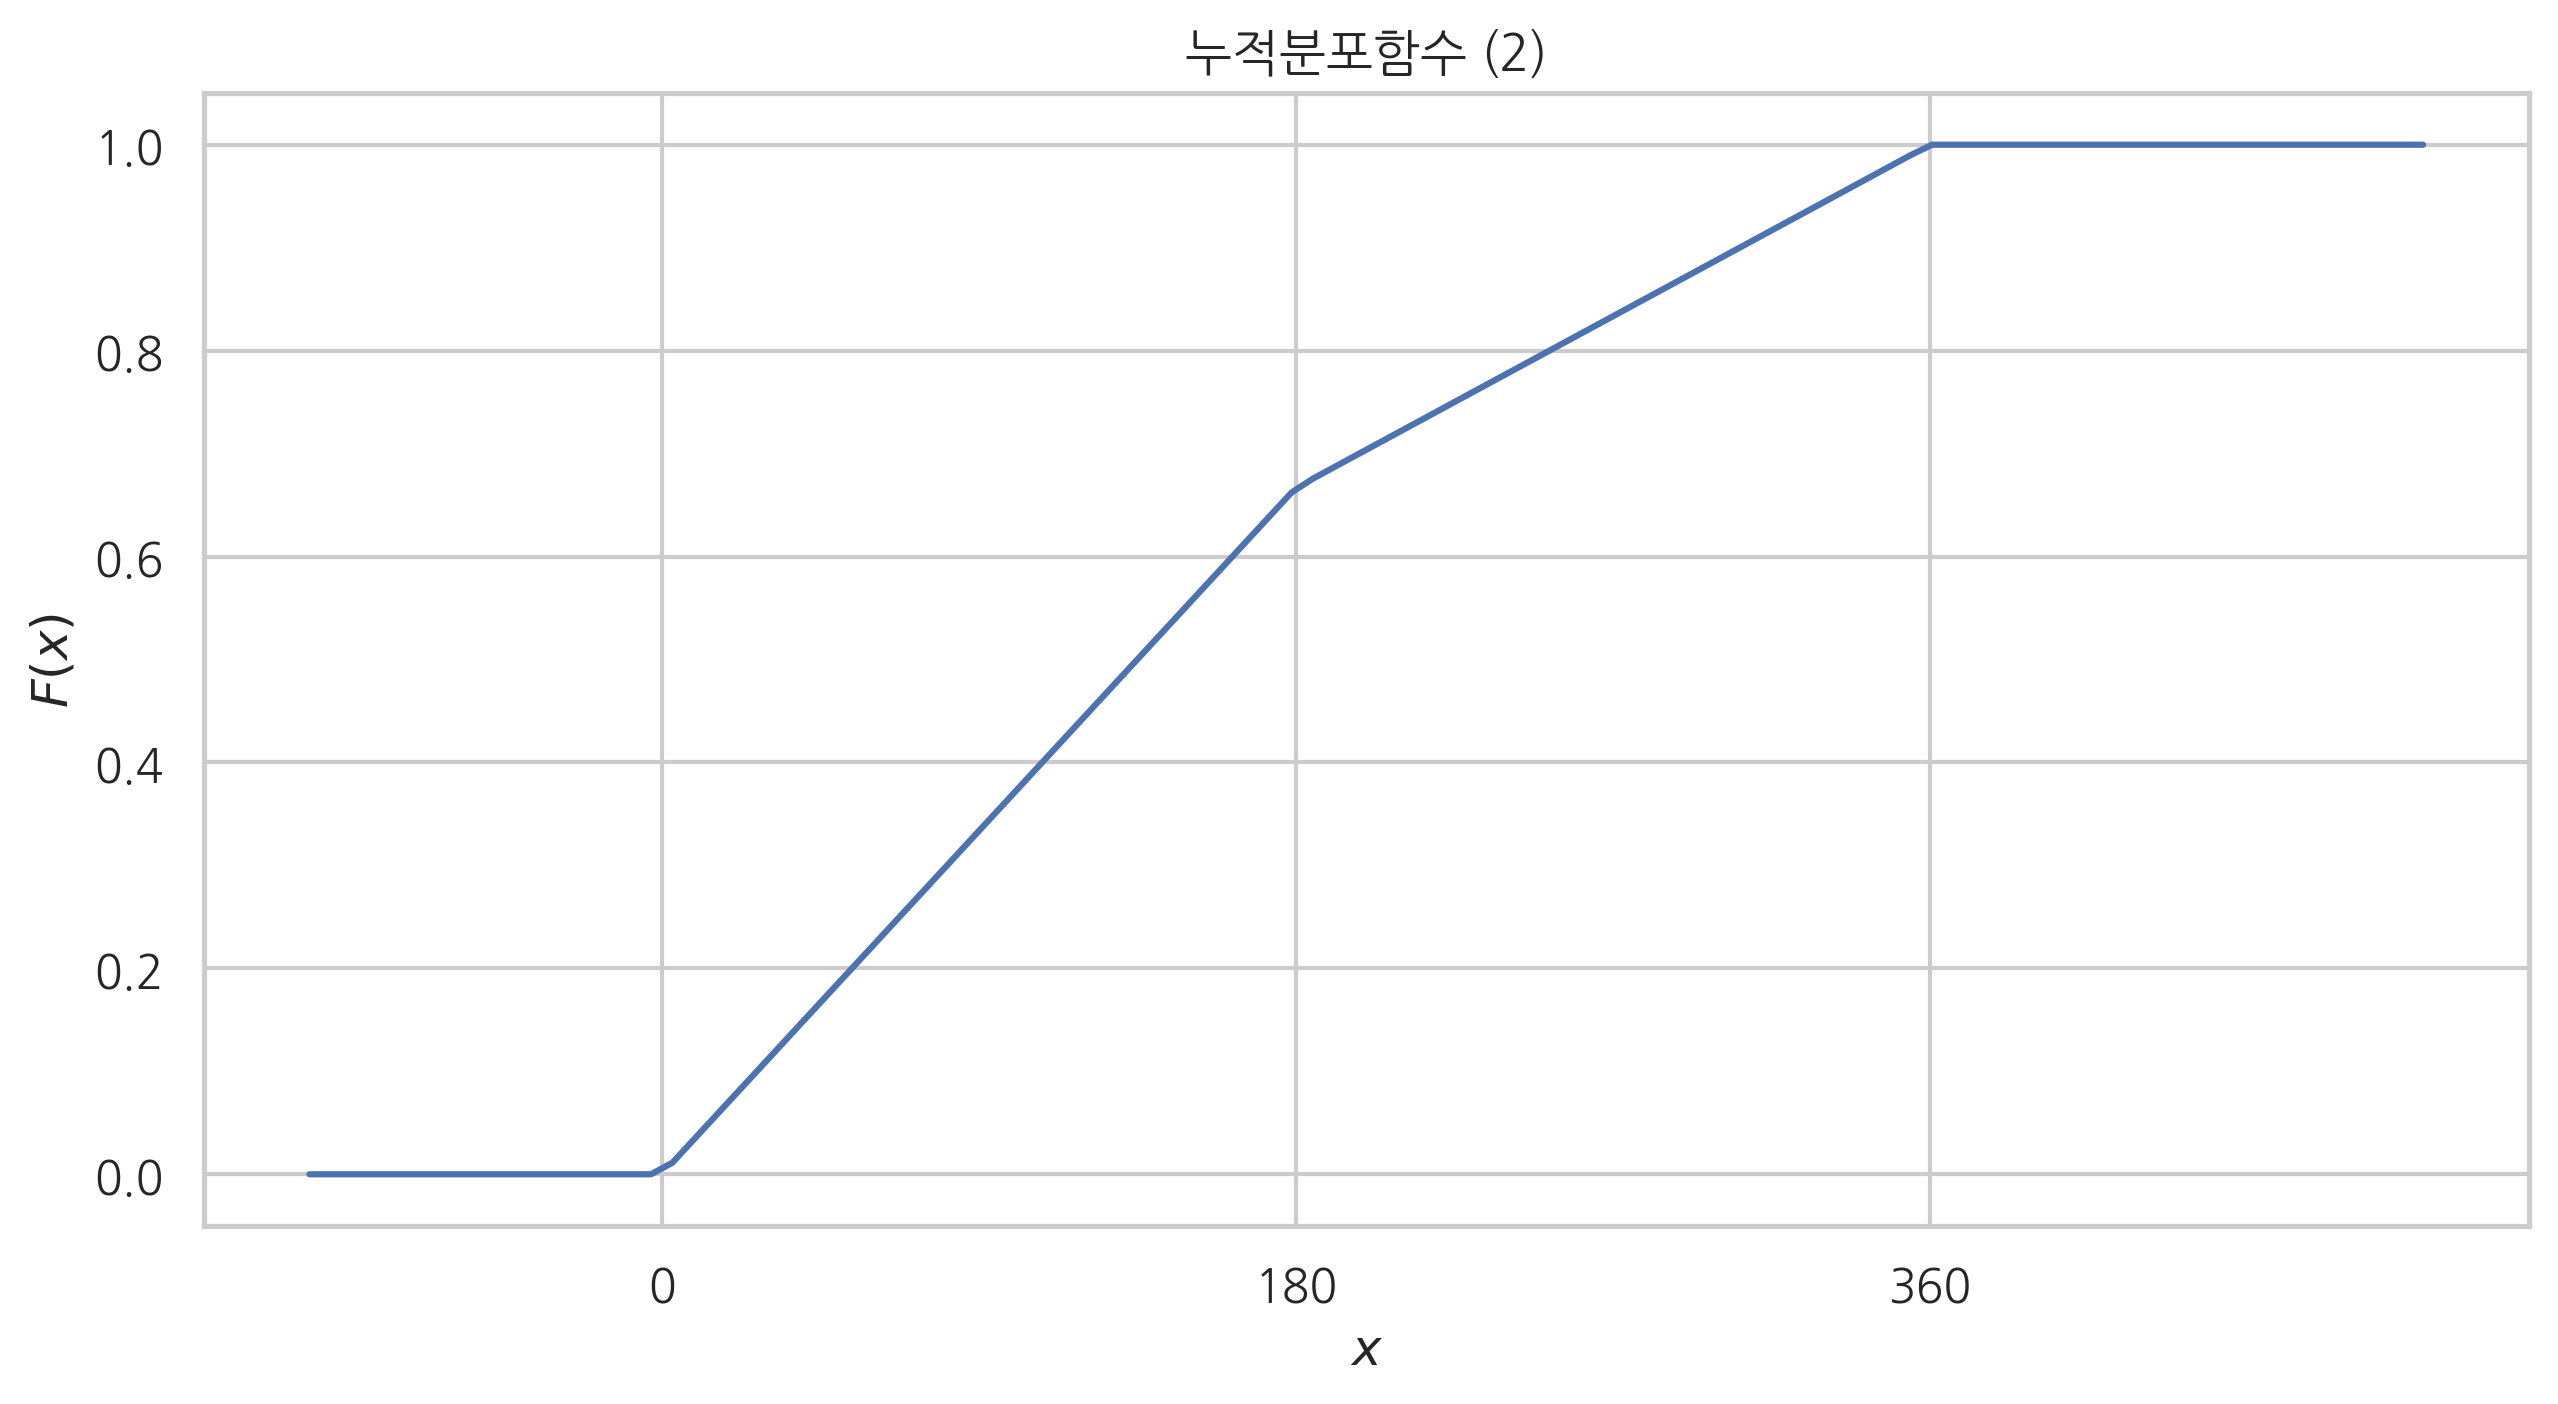

In [89]:
# 다시해보기  # 더 짧은 코드로
F = lambda x : 0 if x < 0 else (2/3)*(x/180) if 0<= x <= 180 else (2/3)+(1/3)*((x-180)/180) if 180 < x <= 360 else 1
xx = np.linspace(-100,500,100)
result = list(map(F, xx))
plt.figure(figsize=(10,5))
plt.plot(xx, result)
plt.xticks([0,180,360])
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.title('누적분포함수 (2)')
plt.show()